In [7]:
import pandas as pd
import matplotlib.pyplot as plt

In [8]:
# Daten laden
chicago_df = pd.read_csv('chicago_weather.csv')
munich_df = pd.read_csv('munich_weather.csv', sep=';', skipinitialspace=True)

chicago_df.head(), munich_df.head()

(   YEAR  MO  DY  HR  TEMP  PRCP   HMDT  WND_SPD  ATM_PRESS     REF
 0  2021   4   1   0  1.01  0.02  64.80     8.48     100.55  202104
 1  2021   4   1   1  0.56  0.05  65.69     8.71     100.58  202104
 2  2021   4   1   2  0.07  0.04  66.78     8.84     100.62  202104
 3  2021   4   1   3 -0.64  0.05  68.31     8.82     100.68  202104
 4  2021   4   1   4 -1.39  0.05  69.78     8.81     100.76  202104,
    STATIONS_ID  MESS_DATUM  QN_3     FX     FM  QN_4  RSK  RSKF    SDK  \
 0         3379    19540601  -999 -999.0 -999.0     1  0.0     1 -999.0   
 1         3379    19540602  -999 -999.0 -999.0     1  0.5     1 -999.0   
 2         3379    19540603  -999 -999.0 -999.0     1  0.0     1 -999.0   
 3         3379    19540604  -999 -999.0 -999.0     1  1.2     1 -999.0   
 4         3379    19540605  -999 -999.0 -999.0     1  6.0     1 -999.0   
 
    SHK_TAG     NM    VPM     PM   TMK    UPM   TXK   TNK    TGK  eor  
 0        0 -999.0 -999.0 -999.0  14.0 -999.0  17.6  10.4 -999.0  e

In [9]:
# Datumsspalten formatieren
chicago_df['DATE'] = pd.to_datetime(
    chicago_df[['YEAR', 'MO', 'DY']].astype(str).agg('-'.join, axis=1),
    errors='coerce'
)

munich_df['DATE'] = pd.to_datetime(munich_df['MESS_DATUM'], format='%Y%m%d', errors='coerce')

In [10]:
# Ungültige Werte aus Chicago-Daten entfernen
chicago_df = chicago_df[chicago_df['TEMP'] > -50]

In [11]:
# Tagesmitteltemperaturen berechnen
chicago_daily = chicago_df.groupby('DATE')['TEMP'].mean().reset_index()
munich_daily = munich_df[['DATE', 'TMK']].dropna()

In [12]:
# Zeitraum auf gemeinsame Daten beschränken
start_date = max(chicago_daily['DATE'].min(), munich_daily['DATE'].min())
end_date = min(chicago_daily['DATE'].max(), munich_daily['DATE'].max())

chicago_daily_clean = chicago_daily[(chicago_daily['DATE'] >= start_date) & (chicago_daily['DATE'] <= end_date)]
munich_daily_clean = munich_daily[(munich_daily['DATE'] >= start_date) & (munich_daily['DATE'] <= end_date)]

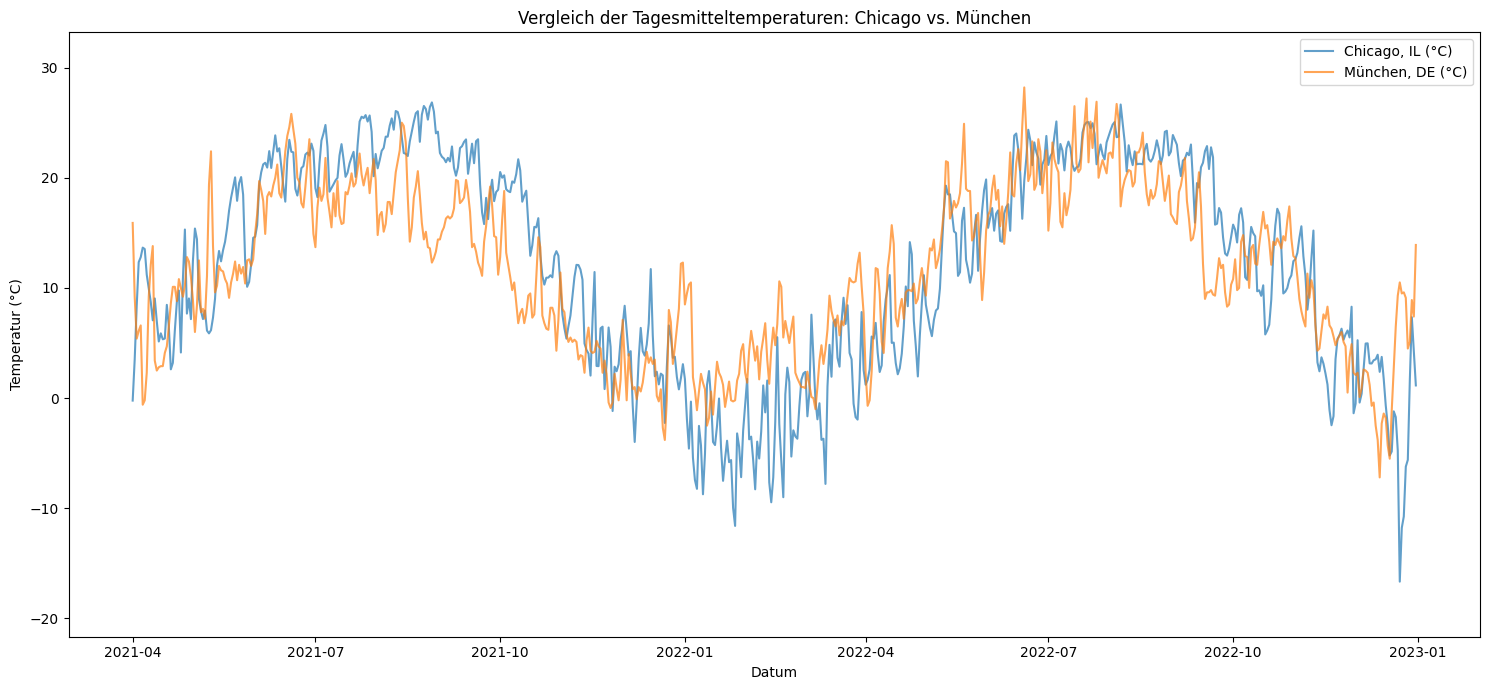

In [17]:
# Plot erstellen
plt.figure(figsize=(15, 7))
plt.plot(chicago_daily_clean['DATE'], chicago_daily_clean['TEMP'], label='Chicago, IL (°C)', alpha=0.7)
plt.plot(munich_daily_clean['DATE'], munich_daily_clean['TMK'], label='München, DE (°C)', alpha=0.7)

min_temp = min(chicago_daily_clean['TEMP'].min(), munich_daily_clean['TMK'].min()) - 5
max_temp = max(chicago_daily_clean['TEMP'].max(), munich_daily_clean['TMK'].max()) + 5
plt.ylim(min_temp, max_temp)

plt.xlabel("Datum")
plt.ylabel("Temperatur (°C)")
plt.title("Vergleich der Tagesmitteltemperaturen: Chicago vs. München")
plt.legend()
plt.tight_layout()
plt.savefig('weather_comparison.png')
plt.show()